## Load necessary modules

In [1]:
# show images inline
%matplotlib inline

# automatically reload modules when they have changed
%load_ext autoreload
%autoreload 2

# import keras
import keras

# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time
import pandas as pd

# set tf backend to allow memory to grow, instead of claiming everything
import tensorflow as tf

def get_session():
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    return tf.Session(config=config)

# use this environment flag to change which GPU to use
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

# set the modified tf session as backend in keras
keras.backend.tensorflow_backend.set_session(get_session())

Using TensorFlow backend.


## Load RetinaNet model

In [14]:
# adjust this to point to your downloaded/trained model
# models can be downloaded here: https://github.com/fizyr/keras-retinanet/releases
model_path = os.path.join('/data/a2301133/RetinaNet/snapshots/', 'resnet50_csv_50.h5')

# load retinanet model
# model = models.load_model(model_path, backbone_name='resnet50')

# if the model is not converted to an inference model, use the line below
# see: https://github.com/fizyr/keras-retinanet#converting-a-training-model-to-inference-model
model = models.load_model(model_path, backbone_name='resnet50', convert=True)

# print(model.summary())

In [15]:
# load label to names mapping for visualization purposes
# labels_to_names = {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microwave', 69: 'oven', 70: 'toaster', 71: 'sink', 72: 'refrigerator', 73: 'book', 74: 'clock', 75: 'vase', 76: 'scissors', 77: 'teddy bear', 78: 'hair drier', 79: 'toothbrush'}
labels_to_names = {}
with open("SF_mapping.txt", "rb") as f:
    for line in f:
        data = line.strip().split(',')
        labels_to_names[int(data[1])] = data[0]
f.close()

In [8]:
img.shape

(1080, 1080, 3)

('processing time: ', 4.6777729988098145)


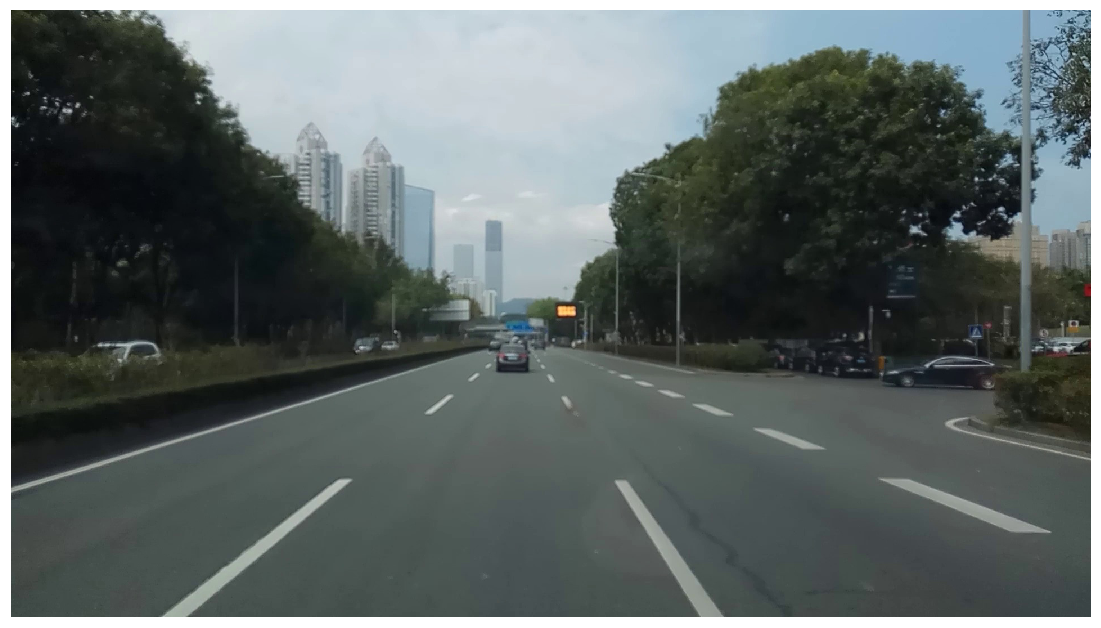

In [35]:
# data = os.listdir(image_folder)
# data = [x for x in data if '.jpg' in x]
# data.sort()
# # data = pd.read_csv("198_result_new.txt", header = None)
data = ['1444.jpg']
image_folder = '/project/ibm/a2301133/402/'

for i in range(0, len(data)):
    image = read_image_bgr(image_folder + data[i])
    # copy to draw on
    draw = image.copy()
    draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)
    
    # preprocess image for network
    w, h = image.shape[0], image.shape[1]
    image = preprocess_image(image)
    image, scale = resize_image(image)

    # process image
    start = time.time()
    boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis = 0))
    print("processing time: ", time.time() - start)

    # correct for image scale
    boxes /= scale

    # visualize detections
    for box, score, label in zip(boxes[0], scores[0], labels[0]):
        # scores are sorted so we can break
        if score < 0.5:
            break

        color = label_color(label)

        b = box.astype(int)
        draw_box(draw, b, color=color)

        caption = "{} {:.3f}".format(labels_to_names[label], score)
        draw_caption(draw, b, caption)

    plt.figure(figsize=(15, 15))    
    plt.axis('off')
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
    plt.margins(0,0)
    plt.imshow(draw)
    plt.savefig(image_folder + 'test.jpg', transparent=True, dpi=300, pad_inches = 0, bbox_inches = 'tight')
    plt.show()
    plt.close()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(1080, 1080, 3)


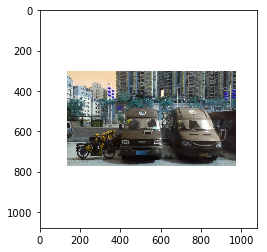

In [11]:
import cv2
import matplotlib.pyplot as plt
# show images inline
%matplotlib inline

# automatically reload modules when they have changed
%load_ext autoreload
%autoreload 2

img_name = '0.jpg'
img_path = '/project/ibm/a2301133/402/FasterRCNN/'
img = cv2.imread(img_path + img_name)
# image, scale = resize_image(img)
# img = cv2.resize(img, (1080, 1080)) 
print img.shape
plt.imshow(img)
plt.show()

In [ ]:
video_path = '/project/ibm/a2301133/402/'
video_name = '2018-03-01_14-08-31-402_cam.mp4'
vidcap = cv2.VideoCapture(video_path + video_name)
success, image = vidcap.read()
count = 0
while success:
    cv2.imwrite(video_path + "%d.jpg" % count, image)     # save frame as JPEG file      
    success, image = vidcap.read()
    print('Read a new frame: ', success)
    count += 1

## Run detection on example

In [ ]:
image_folder = '/project/ibm/a2301133/402/'

In [ ]:

images = os.listdir(image_folder)
images = [x for x in images if '.jpg' in x]
threshold = 0.5
n = len(images)
i = 0
with open("402_result_new.txt", "wb") as f:
    for img_path in images:
        image = read_image_bgr(image_folder + img_path)
        image = preprocess_image(image)
        boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
        n = len(scores)
        m = len(scores[0])
        for i in xrange(n):
            for j in xrange(m):
                if scores[i][j] >= threshold:
                    xmin, ymin, xmax, ymax = boxes[i][j][0], boxes[i][j][1], boxes[i][j][2], boxes[i][j][3]
                    bbox = str(xmin) + ',' + str(ymin) + ',' + str(xmax) + ',' + str(ymax)
                    f.write(str(img_path) +',' + str(bbox) + ',' + str(labels[i][j]) + ',' + str(scores[i][j]) + '\n')
        i += 1
f.close()

In [ ]:
import json
frames_list = []
txt_file = open("402_result_new.txt" , 'rb')
output_path = "402_result_new.json"
for line in txt_file:
    line = line.strip().split(',')
    frame_num = line[0]
    f_dict = {'frame_number': str(frame_num), 'RoIs': ''}
    xmin, ymin, xmax, ymax = int(float(line[1])), int(float(line[2])), int(float(line[3])), int(float(line[4]))
    delta_x, delta_y = xmax - xmin, ymax - ymin
    xmin, ymin, delta_x, delta_y = str(xmin), str(ymin), str(delta_x), str(delta_y)
    rois_list = [xmin, ymin, delta_x, delta_y, labels_to_names.get(int(line[5]))]
    if len(rois_list) > 0:
        f_dict['RoIs'] = ','.join(rois_list) + ';'
    frames_list.append(f_dict)

json_dict = {'output': {'frames': frames_list}}
with open(output_path, 'wb') as out_file:
    json.dump(json_dict, out_file, indent = 4)


In [ ]:
len(data)

In [ ]:
data = os.listdir(image_folder)
data = [x for x in data if '.jpg' in x]
data.sort()
# data = pd.read_csv("198_result_new.txt", header = None)
# data = ['0009660.jpg']

for i in range(0, len(data)):
    image = read_image_bgr(image_folder + data[i])
    # copy to draw on
    draw = image.copy()
    draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)
    
    # preprocess image for network
    image = preprocess_image(image)
    image, scale = resize_image(image)

    # process image
    start = time.time()
    boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis = 0))
    print("processing time: ", time.time() - start)

    # correct for image scale
    boxes /= scale

    # visualize detections
    for box, score, label in zip(boxes[0], scores[0], labels[0]):
        # scores are sorted so we can break
        if score < 0.5:
            break

        color = label_color(label)

        b = box.astype(int)
        draw_box(draw, b, color=color)

        caption = "{} {:.3f}".format(labels_to_names[label], score)
        draw_caption(draw, b, caption)


    plt.figure(figsize=(15, 15))
    plt.axis('off')
    plt.imshow(draw)
    plt.savefig(image_folder + 'FasterRCNN/' + data[i])
#     plt.show()
    plt.close()

In [ ]:
import cv2
import os

image_folder = image_folder + 'FasterRCNN/'
video_name = '402.avi'

images = [img for img in os.listdir(image_folder) if img.endswith(".jpg")]
images = sorted(images, key = lambda x: int(x[:-4]))
frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape
frame = cv2.resize(frame, (width,height))
fourcc = cv2.VideoWriter_fourcc(*'DIVX')
video = cv2.VideoWriter(image_folder + video_name, fourcc, 10, (width,height))

for image in images:
    current_image = cv2.imread(os.path.join(image_folder, image))
    video.write(current_image)

cv2.destroyAllWindows()
video.release()